In [1]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm,metrics
import matplotlib.pyplot as plt


In [2]:
def load_images_from_dictionary(directory):
    images=[]
    labels=[]
    label_map={'cats':0,'dogs':1}
    for subdir in ['cats','dogs']:
        subdir_path=os.path.join(directory,subdir)
        if not os.path.exists(subdir_path):
            print(f"Directory does not exist:{subdir_path}")
            continue
        for filename in os.listdir(subdir_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path=os.path.join(subdir_path,filename)
                img=cv2.imread(img_path)
                img=cv2.resize(img,(128,128))
                #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(label_map[subdir])
    return np.array(images),np.array(labels)

In [3]:
def plot_sample_images(X, y_true, classes, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))  # Convert to RGB for display
        ax.set_title(f'True: {classes[y_true[i]]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

In [4]:
train_path="E:/RCSS/PRODIGY/dogs-vs-cat-small/train"
test_path="E:/RCSS/PRODIGY/dogs-vs-cat-small/test"
validate_path="E:/RCSS/PRODIGY/dogs-vs-cat-small/validation"

In [5]:
train_images,train_labels=load_images_from_dictionary(train_path)
test_images,test_labels=load_images_from_dictionary(test_path)
validate_images,validate_labels=load_images_from_dictionary(validate_path)

In [6]:
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0
validate_images=validate_images.astype('float32')/255.0

In [7]:
train_images=train_images.reshape(train_images.shape[0],-1)
test_images=test_images.reshape(test_images.shape[0],-1)
validate_images=validate_images.reshape(validate_images.shape[0],-1)

In [8]:
scaler=StandardScaler()
train_images=scaler.fit_transform(train_images)
test_images=scaler.transform(test_images)
validate_images=scaler.transform(validate_images)

In [9]:
clf=svm.SVC(kernel="linear")
clf.fit(train_images,train_labels)

SVC(kernel='linear')

In [10]:
validate_pred=clf.predict(validate_images)

In [11]:
validate_accuracy=metrics.accuracy_score(validate_labels,validate_pred)
print(f'Validation Accuracy: {validate_accuracy:.2f}')

Validation Accuracy: 0.55


In [12]:
test_pred=clf.predict(test_images)

In [13]:
test_accuracy=metrics.accuracy_score(test_labels,test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.54


In [14]:
print(metrics.classification_report(test_labels,test_pred,target_names=['Cat','Dog']))

              precision    recall  f1-score   support

         Cat       0.54      0.60      0.57       500
         Dog       0.55      0.49      0.52       500

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



In [15]:
conf_matrix=metrics.confusion_matrix(test_labels,test_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[298 202]
 [256 244]]


In [16]:
def plot_sample_images(X,y_true,y_pred,classes):
    fig,axes=plt.subplots(2,5,figsize=(20,10))
    for i,ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(X[i].reshape(128, 128, 3), cv2.COLOR_BGR2RGB))
        ax.set_title(f'True: {classes[y_true[i]]}\nPred: {classes[y_pred[i]]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

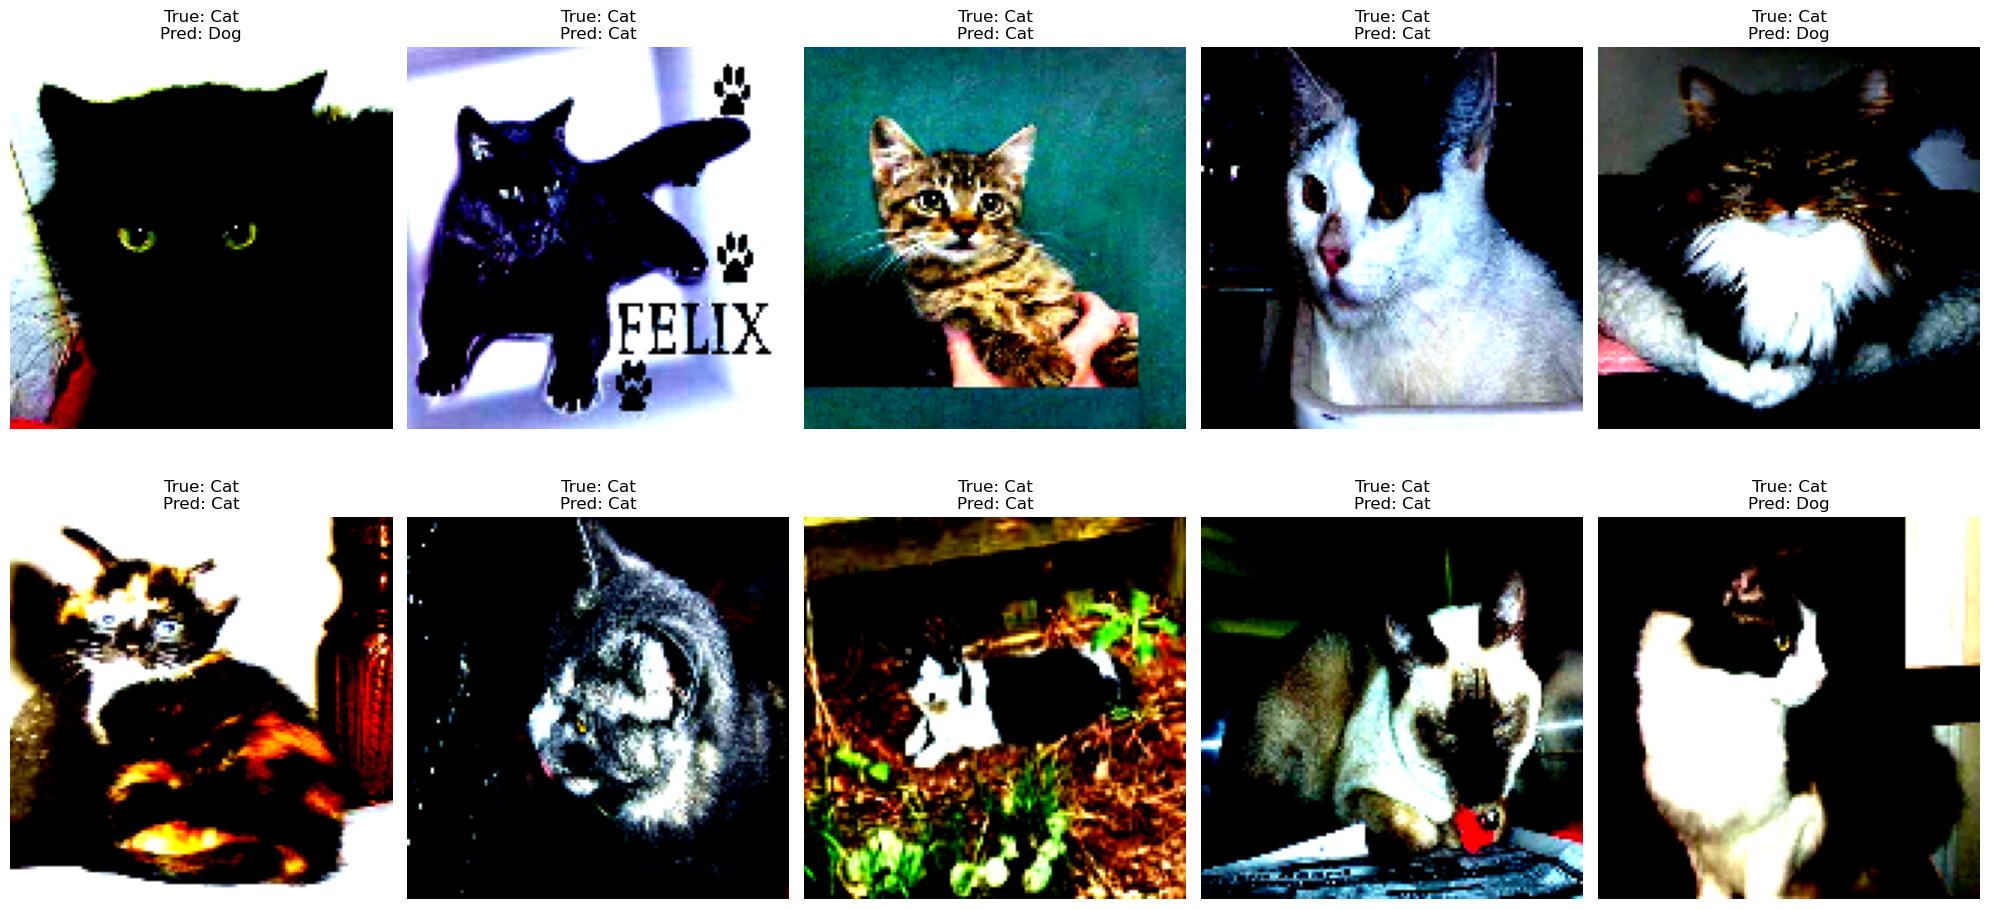

In [17]:
plot_sample_images(test_images.reshape(-1,128,128,3),test_labels,test_pred,['Cat','Dog'])

In [18]:
def predict_single_image(img_path, model, scaler):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, -1)
    img = scaler.transform(img)
    prediction = model.predict(img)
    return prediction

In [19]:
user_image_path = "C:/Users/geena/Desktop/cat.jpg"
prediction = predict_single_image(user_image_path, clf, scaler)
print(f'Prediction for the user-provided image: {"Dog" if prediction == 1 else "Cat"}')

Prediction for the user-provided image: Cat


In [20]:
def plot_user_image(img_path, prediction, classes):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Prediction: {classes[prediction[0]]}')
    plt.axis('off')
    plt.show()

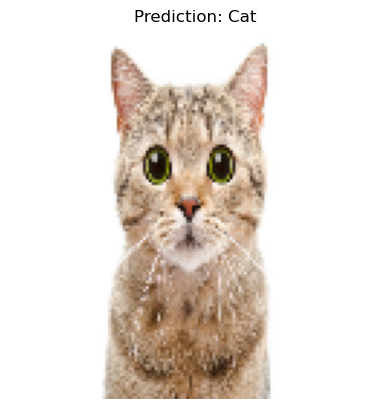

In [21]:
plot_user_image(user_image_path, prediction, ['Cat', 'Dog'])